# On the Analysis of a Label Propagation Algorithm for Community Detection

## Motivation

Detecting communities allows us to understand attributes of vertices (nodes?) from the network topology along

## Max-LPA

- Nodes are assigned labels uniformly at random
- On each step for each node define a neighborhood of local nodes, including itself. View the labels in the neighborhood from the previous step
- Update the node label to the label which is the most frequent in its neighborhood
- If there is no frequent label, take the largest label in its neighborhood
- Community is all nodes with the same label
- Converged if it starts cycling through a collection of states
   - empirical evidence, converges in five steps
   
## Theorems

### Theorem 1

When Max-LPA is executed on a path $P_n$, it converges to a state from which no further label updates occur in $O(\log(n))$ rounds w.h.p. Furthermore, in such a state there are $\Omega(n)$ communities.

### Theorem 2

Let $G(\Pi,\pi, p')$ be a clustered Erdos-Renyi graph. Suppose that the probabilities $\{p_i\}$ and $p_i$ and the node subset sizes $\{n_i\}$ and $n$ satisfy the inequalities

(i) $n_i p_i^2 > 8np'$

(ii) $n_i p_i^4 > 1800c \log(n)$

for some constant $c$. Then, given input $G(\Pi,\pi, p')$, Max-LPA converges correctly to node patition $\Pi$ in two rounds w.h.p. (Note that condition (ii) implies for each $i$, $p_i > \frac{\log(n_i)}{n_i}$

## Probability Bounds

$Pr(\left| X - E[X] \right| > \sqrt{3cE[X]\log(n)}) \leq \frac{1}{n^c}$

## two round Max-LPA

At the end of the second round of Max-LPA w.h.p. every node in $V_i$ has label $l_{u1}$.

Using theorems and tail bounds w.h.p. $v$ has more than $n_i p_i(1-\epsilon)$ neighbors in $V_i$ and fewer than $n_i p_i (1 + \epsilon)/8$ neighbors outside $V_i$, hence $v$ has no reason to change its label.

In [2]:
import networkx as nx
import time
import math
import numpy as np
import scipy.stats
import itertools
import matplotlib.pyplot as plt
#import seaborn.apionly as sns
from matplotlib import animation

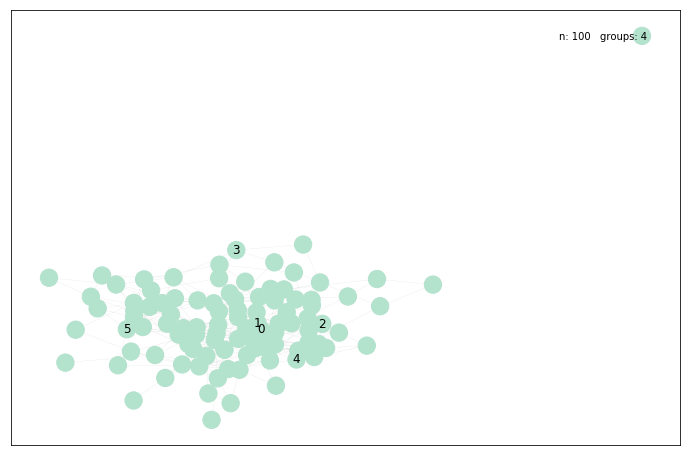

In [3]:
n = 100
c = 1
p = (c * math.log(n)) / n
k = 3 # number of groups
G = nx.empty_graph(n)
#pos = nx.spring_layout(G)
labels = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5"}
#labels = {}

# can't get it to draw on ax??
# ax needs to be in same cell
fig, ax = plt.subplots(figsize=(12,8))

def initialize_graph(n, p):

    internal_edges = list(itertools.combinations(list(G.nodes), 2))
    
    for i in range(n):
        G.add_node(i, group=0, label=i)
    
    for possible_edge in internal_edges:
        if np.random.uniform(0,1) <= p:
            G.add_edge(*possible_edge)
            #print("adding edge between nodes", possible_edge)
    
    pos = nx.spring_layout(G)
    #nx.draw(G, pos=pos, with_labels=True, ax=ax)
    
    return G, pos

# init function for redraw to reduce computation
def init_function():
    return G

# animate graph where i is frame number
def animate(i):
    ax.clear()
    
    # visualize nodes being relabled
    labels[i] = "A"
    nx.draw(G, pos=pos, labels=labels, with_labels=True, ax=ax)
    return G

# initialize global graph and position of nodes
G, pos = initialize_graph(n, p)


colors = [ G.node[i]['group'] for i in G.nodes]
nx.draw_networkx(G, pos=pos, labels=labels, with_labels=True, node_color = colors, 
                 width=0.03, cmap=plt.get_cmap('Pastel2'), ax=ax)
ax.text(0.95, 0.95, "n: "+str(n)+"   groups: "+str(k+1), ha="right", va="top", transform=plt.gca().transAxes)
#ax.text(0.95, 0.90, "step: "+str(m), ha="right", va="top", transform=plt.gca().transAxes)

# call the animator.  blit=True means only re-draw the parts that have changed.
# interval is in ms
#anim = animation.FuncAnimation(fig, animate, init_func=init_function,
#                               frames=n, interval=1000, repeat=False)

#anim.save('basic_animation.mp4', fps=1, extra_args=['-vcodec', 'libx264'])

plt.show()

In [162]:
def theorem_2(n, ni, p1, p2, c):
    if ni * p1**2 > 8 * n * p2 and ni * p1**4 > 1800 * c * math.log(n):
        return True
    else:
        return False

Initializing first sub graph
propagating labels at 2 th round
propagating labels at 3 th round
propagating labels at 4 th round
propagating labels at 5 th round
......time to run 1.1269769668579102


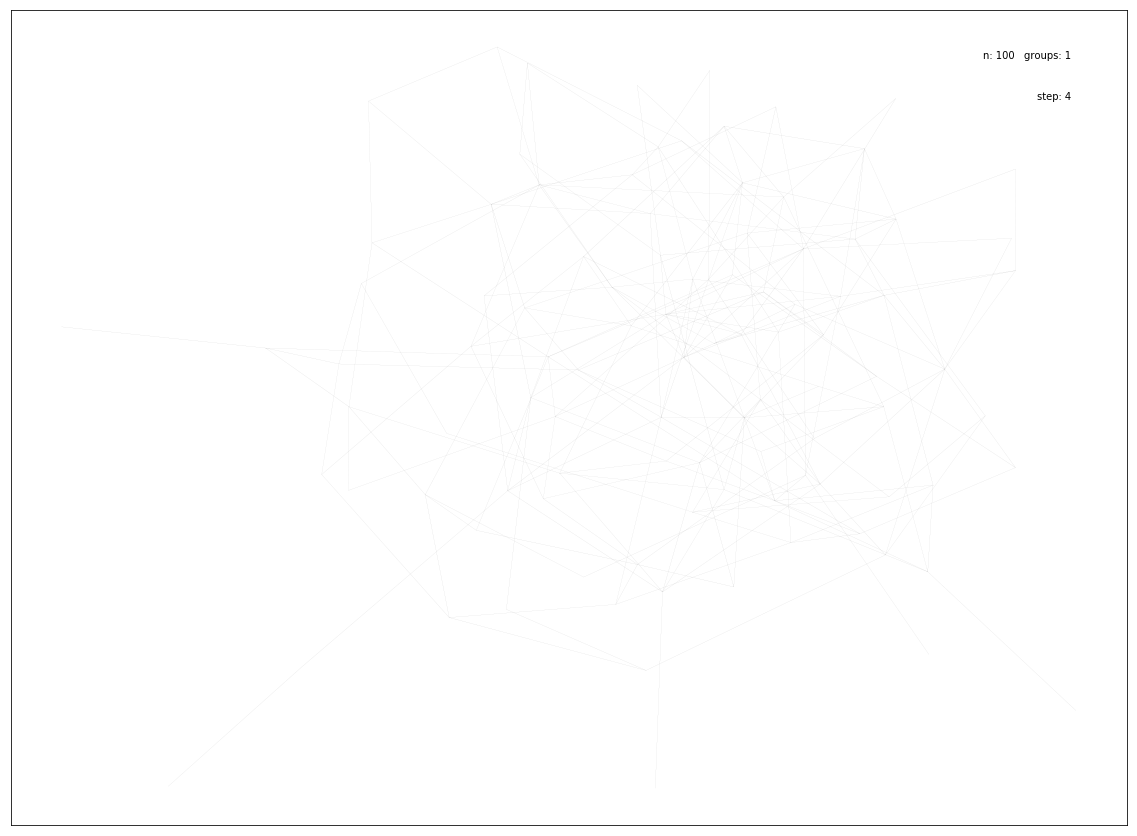

In [5]:
n, k = 100, 0
c = 1
p1 = (c * math.log(n)) / n
p2 = 0.6 / n

# can't get it to draw on ax??
# ax needs to be in same cell
fig, ax = plt.subplots(figsize=(20,15))

def initialize_graph(n, p):
    G = nx.empty_graph(n)

    internal_edges = list(itertools.combinations(list(G.nodes), 2))
    
    for i in range(n):
        randomized_label = np.random.uniform(0,1)
        G.add_node(i, group=0, label=i, stabilized=False, random_label=randomized_label, previous_label=randomized_label)
    
    for possible_edge in internal_edges:
        if np.random.uniform(0,1) <= p:
            G.add_edge(*possible_edge)
            #print("adding edge between nodes", possible_edge)
    
    pos = nx.spring_layout(G)
    
    return G, pos

def incorporate_graph(G, n, p1, p2, k):
    
    max_label = max(list(G.nodes))
    G1_nodes = list(G.nodes)
    G2_nodes = list(range(max_label+1,max_label+1+n))

    # add new nodes to cosmos network
    for i in range(max_label+1,max_label+1+n):
        #print("adding new node to G", i)
        randomized_label = np.random.uniform(0,1)
        G.add_node(i, group=k, label=i, stabilized=False, random_label=randomized_label, previous_label=randomized_label)
    
    # get distinct edges to calculate different probability of connectivity
    external_edges = list(itertools.combinations(G1_nodes, 2))
    internal_edges = list(itertools.combinations(G2_nodes, 2))
    all_connected_edges = list(itertools.combinations(G1_nodes + G2_nodes, 2))
    new_connected_edges = list(set(all_connected_edges) - set(external_edges) - set(internal_edges))
    
    for possible_edge in internal_edges:
        if np.random.uniform(0,1) <= p1:
            G.add_edge(*possible_edge)
            #print("adding edge between internal nodes", possible_edge)
    
    for possible_edge in new_connected_edges:
        if np.random.uniform(0,1) <= p2:
            G.add_edge(*possible_edge)
            #print("adding edge between external nodes", possible_edge)
            
    pos = nx.spring_layout(G)
    
    return G, pos

def label_choice(G, axis):
    
    labels = []
    for node in G.nodes:
        labels.append(G.node[node][axis])
    return labels

def label_propagation(G, i, labels):
    '''
    Iterating through each node one at a time, get the labels of its neighbors
    Update label with the mode of the neighbors (including self) if mode > 1, else
    update label with the max label of the neighbors
    '''
    
    for node in G.nodes:
        
        nearest_neighbors = nx.single_source_shortest_path_length(G, node, cutoff=1)
        neighborhood_labels = [ G.node[neighbor]['random_label'] for neighbor in nearest_neighbors ]
 
        #print("node", node,"label", G.node[node]['random_label'], "versus neighborhood labels", neighborhood_labels)
        
        mode_label = scipy.stats.mode(neighborhood_labels)
        #stabilized = False
        
        # take the most common label of neighbors
        # or take max label of neighbors
        if mode_label.count > 1:
            refresh_label = float(mode_label.mode)
        elif len(neighborhood_labels) > 0:
            refresh_label = max(neighborhood_labels)
        else:
            refresh_label = G.node[node]['random_label']
            
        # check stability
        if G.node[node]['previous_label'] == G.node[node]['random_label']:
            stabilized = True
        else:
            stabilized = False
        
        labels[node] = round(refresh_label, 2)
        G.node[node]['previous_label'] = G.node[node]['random_label'] 
        G.node[node]['random_label'] = refresh_label 
        G.node[node]['stabilized'] = stabilized
    
    return labels

def convergence(i, previous_labels, current_labels): 

    #previous_set = set(previous_labels.items())
    previous_set = set(previous_labels)
    current_set = set(current_labels)
    difference_set = previous_set ^ current_set
    #print("previous set", previous_set)
    #print("current set", current_set)

    if len(difference_set) == 0:
        #print("the network has converged at the", i+1, "th step")
        return True
    else:
        return False
    
# init function for redraw to reduce computation
def init_function():
    return G, labels

# animate graph where i is frame number
def animate(i, G, labels):
    ax.clear()
    global n, k, m, converged
    #print("animate * labels", labels)
    #print("animate values", i, converged, labels)
    # visualize nodes being relabled
    # check convergence
    if not converged and i > 0:
        previous_labels = label_choice(G, 'previous_label')
        current_labels = label_choice(G, 'random_label')
        converged = convergence(i, previous_labels, current_labels)
        print("propagating labels at", i+1, "th round")
        labels = label_propagation(G, i, labels)
        m = i
    elif i == 0:
        labels = label_propagation(G, i, labels)
    
    if converged:
        #print("stopping label propagation due to convergence ", converged, "at the", i, "th step", m)
        #print("converged labels", labels)
        print('.', sep='', end='')
    
    
    stabilized = [ i for i in G.nodes if G.node[i]['stabilized'] == True]
    not_stabilized = [ i for i in G.nodes if G.node[i]['stabilized'] == False]
    #colors = [ G.node[i]['group'] for i in G.nodes]
    stab_colors = [ G.node[i]['group'] for i in stabilized]
    not_stab_colors = [ G.node[i]['group'] for i in not_stabilized]
    
    '''
    nx.draw_networkx(G, pos=pos, nodelist = stabilized, node_shape = 'v',
                     labels=labels, with_labels=False, node_color = stab_colors, 
                     width=0.03, cmap=plt.get_cmap('Pastel2'), ax=ax)
    '''
    nx.draw_networkx(G, pos=pos, nodelist = not_stabilized, node_shape = 'o',
                     labels=labels, with_labels=False, node_color = not_stab_colors, 
                     width=0.03, cmap=plt.get_cmap('Pastel2'), ax=ax)
    ax.plot([0], [0])
    #plt.legend()
    ax.text(0.95, 0.95, "n: "+str(n)+"   groups: "+str(k+1), ha="right", va="top", transform=plt.gca().transAxes)
    ax.text(0.95, 0.90, "step: "+str(m), ha="right", va="top", transform=plt.gca().transAxes)
    return G, labels


print("Initializing first sub graph")
G, pos = initialize_graph(n, p)
m = 0

for i in range(2,k+2):
    print("Incorporating", i, "th sub graph")
    G, pos = incorporate_graph(G, n, p1, p2, i)

labels = {}
converged, convergedS2 = False, False

colors = [ G.node[i]['group'] for i in G.nodes]
#nx.draw(G, pos=pos, labels=labels, with_labels=True, node_color = colors, cmap=plt.get_cmap('Pastel2'))

# call the animator.  blit=True means only re-draw the parts that have changed.
# interval is in ms
start_time = time.time()
anim = animation.FuncAnimation(fig, animate, init_func=init_function,
                               fargs=(G, labels),
                               frames=10, interval=1000, repeat=False, blit = False)

anim.save('basic_animation.mp4', fps=1, extra_args=['-vcodec', 'libx264'])

end_time = time.time()
program_time = end_time - start_time 
print("time to run", program_time)
plt.show()

In [157]:
ni, k = 250, 3
n = ni * (k+1)
c = 0.1
p1 =((2400 * c * math.log(ni)) / ni)**(1/4)
p2 = 0.6 / ni
#p2 = p1 / (32*3)
theorem_2(n, ni, p1, p2, c)

True

In [153]:
print(ni * p1**2, 8 * n * p2)

1287.5796157736083 19.2


In [154]:
print(ni * p1**4, 1800 * c * math.log(n))

1657.8612669557128 1492.928935218365


In [155]:
p1, p2

(1.1347156541502406, 0.0006)